In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [3]:
df = load_iris()

In [5]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
dd = pd.DataFrame(df.data,df.target,columns=df.feature_names)

In [9]:
dd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


In [10]:
dd['target'] = df.target

In [11]:
dd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
0,4.9,3.0,1.4,0.2,0
0,4.7,3.2,1.3,0.2,0
0,4.6,3.1,1.5,0.2,0
0,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
2,6.7,3.0,5.2,2.3,2
2,6.3,2.5,5.0,1.9,2
2,6.5,3.0,5.2,2.0,2
2,6.2,3.4,5.4,2.3,2


In [12]:
dd.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)

In [13]:
dd

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
0,1.4,0.2,0
0,1.3,0.2,0
0,1.5,0.2,0
0,1.4,0.2,0
...,...,...,...
2,5.2,2.3,2
2,5.0,1.9,2
2,5.2,2.0,2
2,5.4,2.3,2


Text(0, 0.5, 'Petal width')

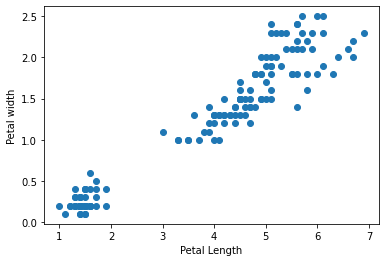

In [15]:
plt.scatter(dd['petal length (cm)'],dd['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal width')

In [24]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(dd[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
dd['cluster'] = y_predicted

In [26]:
dd

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,1
0,1.4,0.2,0,1
0,1.3,0.2,0,1
0,1.5,0.2,0,1
0,1.4,0.2,0,1
...,...,...,...,...
2,5.2,2.3,2,0
2,5.0,1.9,2,0
2,5.2,2.0,2,0
2,5.4,2.3,2,0


In [27]:
km.cluster_centers_


array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [28]:
df1 = dd[dd.cluster==0]
df2 = dd[dd.cluster==1]


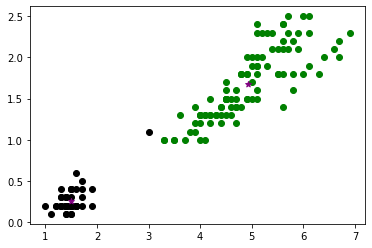

In [31]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


In [34]:
scaler = MinMaxScaler()

scaler.fit(dd[['petal length (cm)']])
dd['petal length (cm)'] = scaler.transform(dd[['petal length (cm)']])

scaler.fit(dd[['petal width (cm)']])
dd['petal width (cm)'] = scaler.transform(dd[['petal width (cm)']])

In [35]:
dd.head()

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
0,0.067797,0.041667,0,1
0,0.050847,0.041667,0,1
0,0.084746,0.041667,0,1
0,0.067797,0.041667,0,1


In [36]:
dd.drop('target',axis='columns',inplace=True)

In [37]:
dd

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
0,0.067797,0.041667,1
0,0.050847,0.041667,1
0,0.084746,0.041667,1
0,0.067797,0.041667,1
...,...,...,...
2,0.711864,0.916667,0
2,0.677966,0.750000,0
2,0.711864,0.791667,0
2,0.745763,0.916667,0


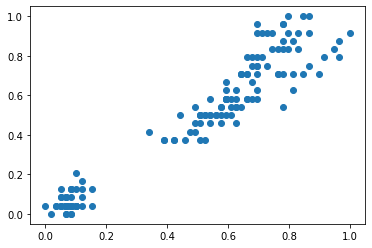

In [38]:
plt.scatter(dd['petal length (cm)'],dd['petal width (cm)'])

In [50]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dd[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
dd['cluster']=y_predicted
dd.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
0,0.067797,0.041667,1
0,0.050847,0.041667,1
0,0.084746,0.041667,1
0,0.067797,0.041667,1


In [52]:
km.cluster_centers_


array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

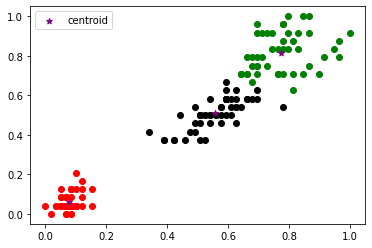

In [53]:
df1 = dd[dd.cluster==0]
df2 = dd[dd.cluster==1]
df3 = dd[dd.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [56]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dd[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[28.36835321972719,
 5.176463590044367,
 1.7018746881920968,
 1.1588792731667124,
 0.8535683225340074,
 0.6806539059219306,
 0.565127345570398,
 0.485808455391437,
 0.41565361271607326]

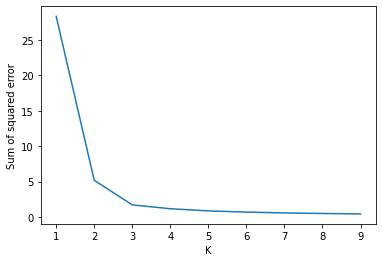

In [55]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)